In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
upload=files.upload()

Saving Customer-Churn-Records.csv to Customer-Churn-Records (1).csv


In [ ]:
df = pd.read_csv('Customer-Churn-Records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
# hence no missing values in any of the columns

In [ ]:
# different countries people are from
print('Total no of different countries people are from:\n', df['Geography'].unique())
print('\n Total no of male and female members:', df['Gender'].value_counts())
print('\n People with different type of card types:', df['Card Type'].value_counts())

Total no of different countries people are from:
 ['France' 'Spain' 'Germany']

 Total no of male and female members: Gender
Male      5457
Female    4543
Name: count, dtype: int64

 People with different type of card types: Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1500x1000 with 0 Axes>

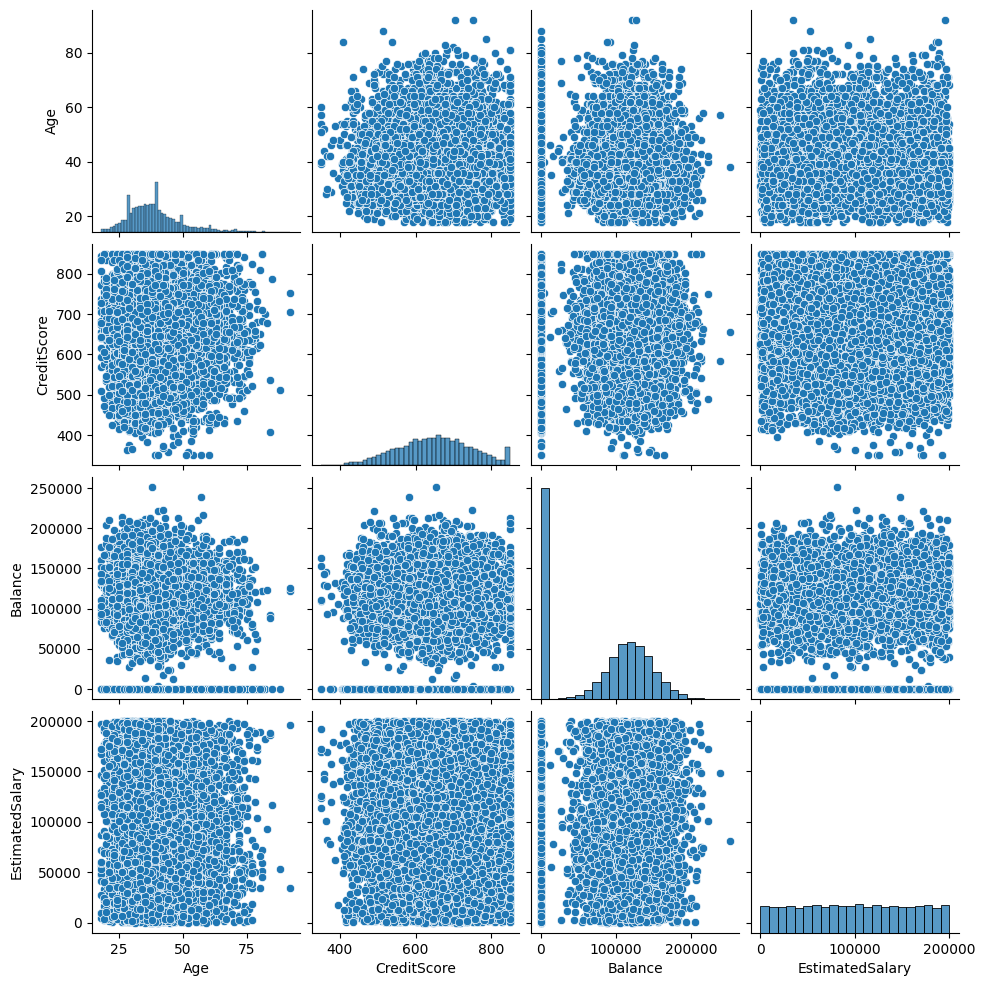

In [ ]:
# now we'll see the relation bw each factors from the data
To_plot = ['Age' , 'CreditScore' , 'Balance' , 'EstimatedSalary']
plt.figure(figsize = (15,10))
sns.pairplot(df[To_plot])
plt.show()

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
# now we'll remove the outliers
df = df[df['Age']<75]
df = df[df['Balance']<200000]
df = df[df['CreditScore']>400]


In [ ]:
# now we have taken care of the outliers

In [ ]:
data = df.copy()

In [ ]:
# dropping unnecessary columns
data = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
# to convert the categorical rows into numerical
data = pd.get_dummies(data, drop_first = True)

In [ ]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,300,False,False,True,False,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771,False,False,True,False,True,False
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,564,False,False,False,False,False,True
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339,True,False,True,True,False,False


In [ ]:
# I believe that customers with bank balance 0 will mostly leave so we can drop all those who have bank balance 0
data_1 = data[data['Balance']!=0]
data_2 = data[data['Balance']==0]

<Figure size 1500x1000 with 0 Axes>

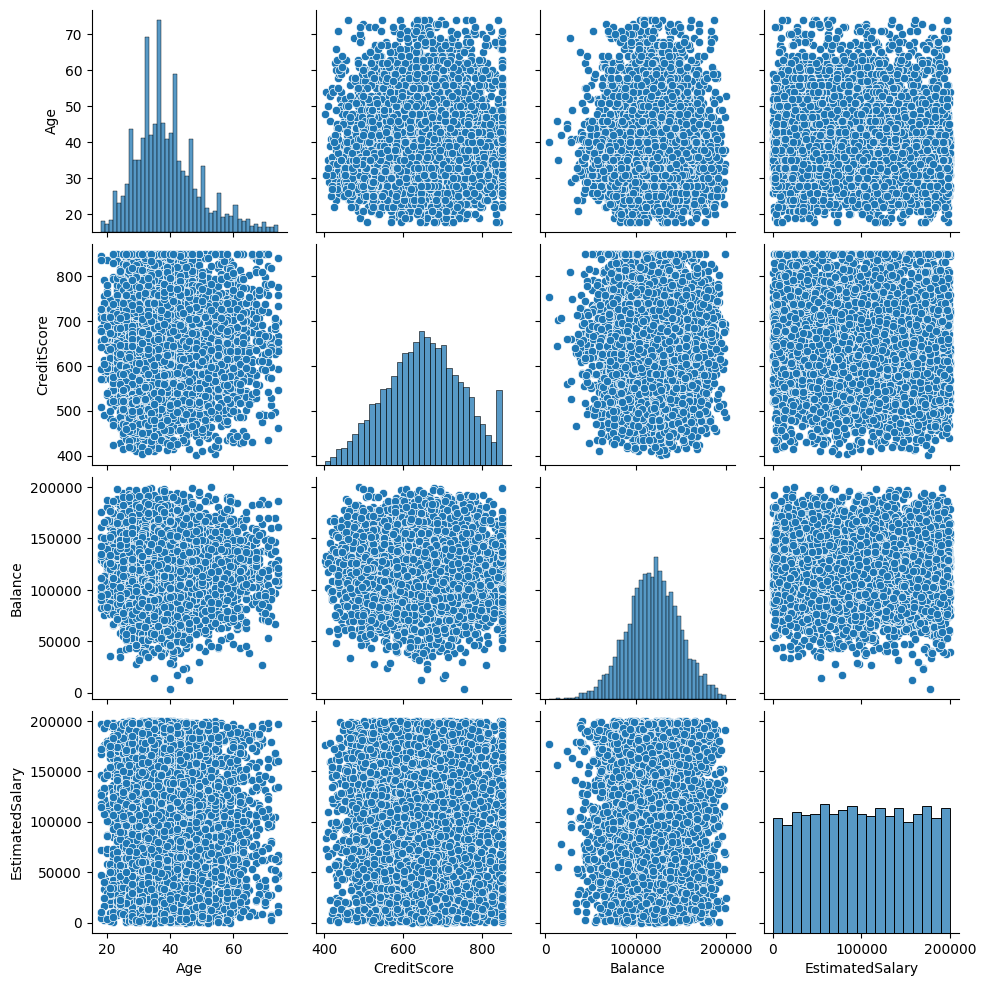

In [ ]:
plt.figure(figsize = (15,10))
sns.pairplot(data_1[To_plot])
plt.show()

In [ ]:
# now to get rid of the outliers in Balance
data_1 = data_1[data_1['Balance']>30000]

<Figure size 1500x1000 with 0 Axes>

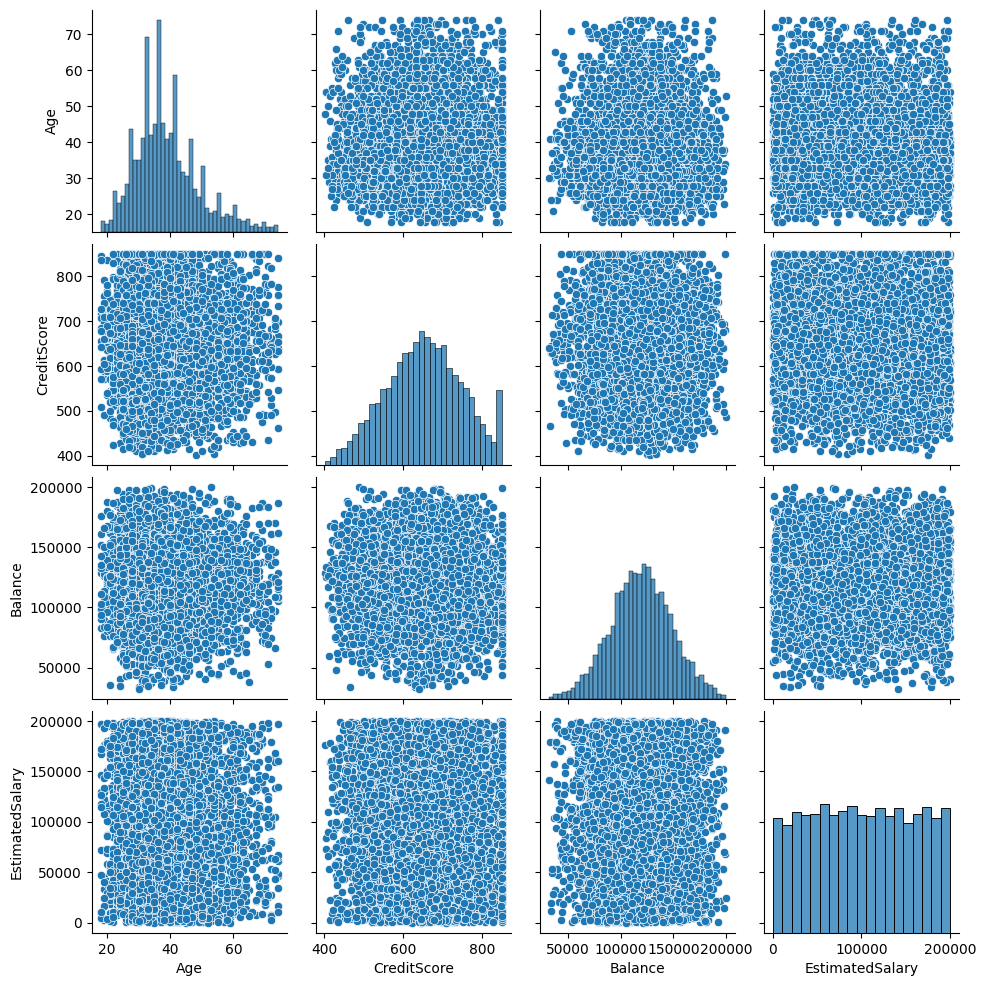

In [ ]:
plt.figure(figsize = (15,10))
sns.pairplot(data_1[To_plot])
plt.show()

In [ ]:
data_1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False
5,645,44,8,113755.78,2,1,0,149756.71,1,1,5,484,False,True,True,False,False,False
8,501,44,4,142051.07,2,0,1,74940.50,0,0,3,251,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,53,4,88381.21,1,1,0,69384.71,1,1,3,369,False,False,False,True,False,False
9993,644,28,7,155060.41,1,1,0,29179.52,0,0,5,715,False,False,True,False,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771,False,False,True,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339,True,False,True,True,False,False


In [ ]:
# now let us continue with lr model
X = data_1.drop(columns = ['Exited'])
y = data_1['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.20, random_state=69)

In [ ]:
# now well do scaling of the training data using standardisation method

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
classifier = lr.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Accuracy for LogisticRegression Classifier')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

Accuracy for LogisticRegression Classifier
[[927   2]
 [  1 329]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       0.99      1.00      1.00       330

    accuracy                           1.00      1259
   macro avg       1.00      1.00      1.00      1259
weighted avg       1.00      1.00      1.00      1259

0.9976171564733916


In [ ]:
print('99% of the records in the test set correctly predicted \n whether the customer would churn using LogisticRegression')

99% of the records in the test set correctly predicted 
 whether the customer would churn using LogisticRegression


<Axes: >

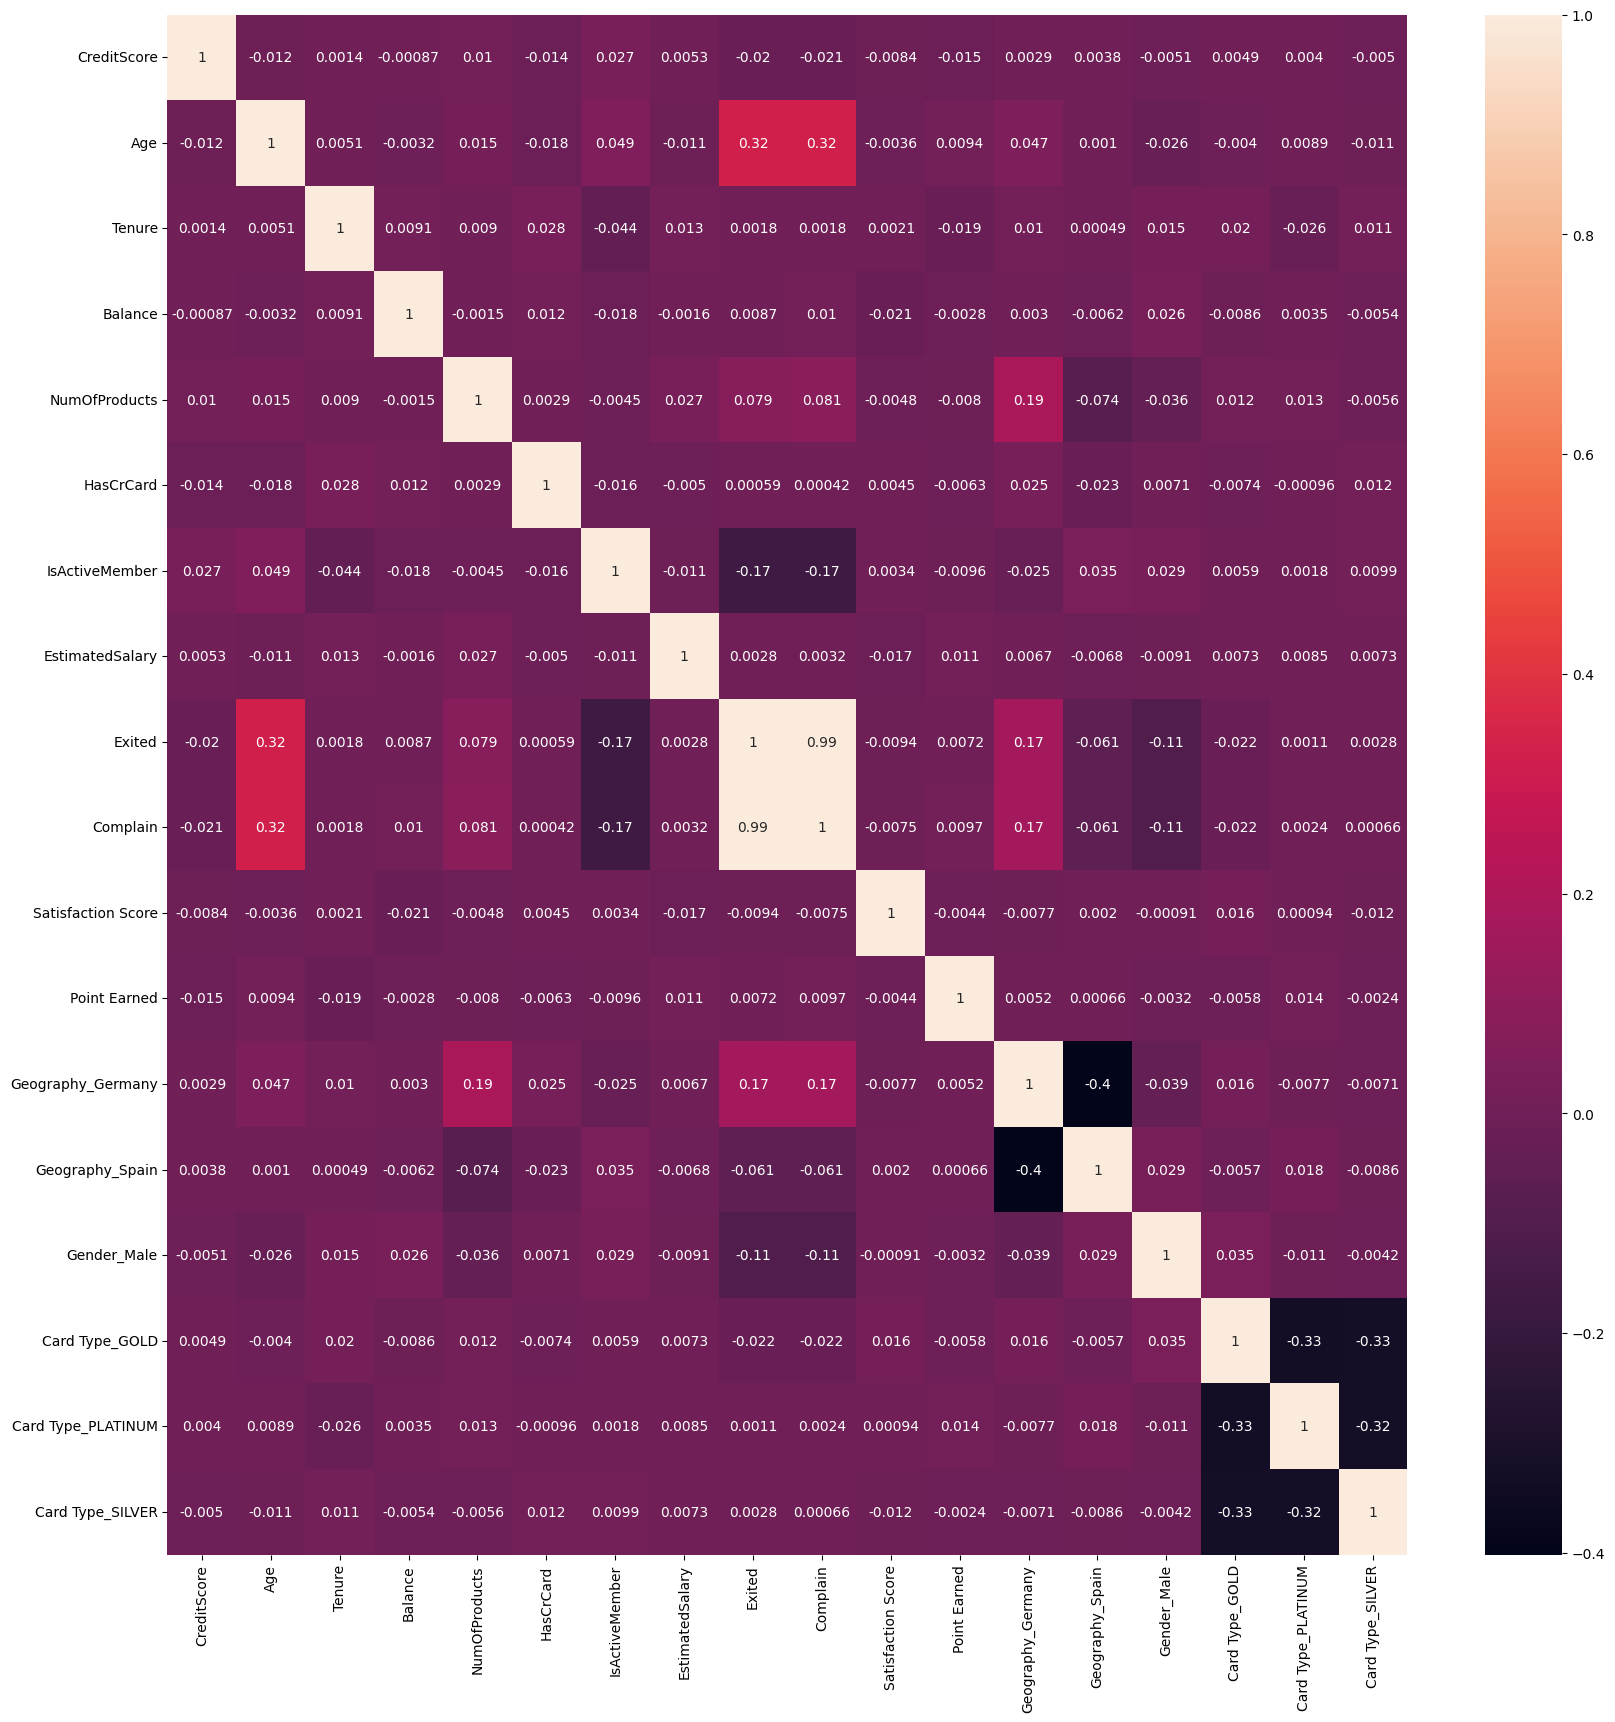

In [ ]:
# now we'll see which all factors affect and how much they influence in exiting of a customer
plt.figure(figsize = (20,20))
sns.heatmap(data_1.corr(), annot = True)
